In [113]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import sympy
import scipy.optimize as opt

### Question 1

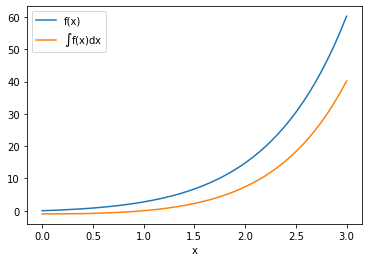

In [114]:
# Defining the function and its integral
x = sympy.symbols("x")
def func(x):
    return x*sympy.exp(x)

def integrate(x):
    return sympy.integrate(func(x),x)

# Evaluating the values from 0 to 3
x_val = np.linspace(0,3)
f_val = []
F_val = []

for i in x_val:
    f_val.append(func(x).evalf(subs={x: i}))
    F_val.append(integrate(x).evalf(subs={x: i}))

# Plotting
plt.plot(x_val,f_val)
plt.plot(x_val,F_val)
plt.xlabel('x')
plt.legend(['f(x)', '$\int$f(x)dx'])
plt.show()

 ### Question 2 (a)

In [115]:
file = open("lat.dat","r")
mod_file = open("latmod.dat","w")

# Reading the file
data = []
while True:
    line = file.readline()
    if line:
        data.append(list(map(float, line.split()[0:])))
    if not line:
        break
file.close

# Writing th modified file
for i in range(len(data)):
    mod_file.write('%f %f \n' %(data[i][0]**3, data[i][1] ))
mod_file.close()

### Question 2 (b)

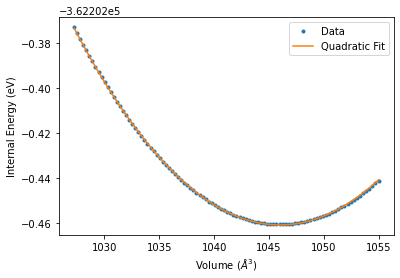

In [101]:
# Directly reading the file
V_data, E_data = np.loadtxt('latmod.dat', delimiter= None, unpack=True)

# Quadratic fitting of the data
# y = ax^2+bx+c
coeffs = np.polyfit(V_data, E_data, 2)

a, b, c = coeffs[0], coeffs[1], coeffs[2]

# Obtaining the guess parameters

V_0 = - b / 2.0 * a
E_0 = a * V_0 ** 2.0 + b * V_0 + c
B_0 = 2.0 * a * V_0
Bd_0
init = [V_0, E_0, B_0, Bd_0]

#Plotting the data with its polynomial fit
v = np.linspace(min(V_data),max(V_data),100)
plt.plot(V_data, E_data,'.')
plt.plot(v, a * v ** 2 + b * v + c)
plt.ylabel("Internal Energy (eV)")
plt.xlabel("Volume ($\AA^3$)")
plt.legend(('Data', 'Quadratic Fit'))
plt.show()

### Question 2 (c)

In [116]:
# Defining the function for BM equation of state
def bm_eos(V, V0, E0, B0, Bd0):
    E = E0 + 9. * B0 * V0 / 16. * (((V0 / V) ** (2. / 3.) - 1.) ** 3. * Bd0 + ((V0 / V) ** (2. / 3.) - 1.)** 2. * (6. - 4. * (V0 / V) ** (2. / 3.)))
    return E

#Optimisation
popt, pcov = opt.curve_fit(bm_eos, V_data, E_data, p0 = init)

#Printing the optimised values
print("V0 = ", popt[0])
print("E0 = ", popt[1])
print("B0 = ", popt[2])
print("Bd0 = ", popt[3])

V0 =  6.43592210512202e-05
E0 =  -362202.4383901
B0 =  3.192866002940337e-08
Bd0 =  4.0


C:\Users\jdcha\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
